In [1]:
import pandas as pd
import os

import statistics
import numpy as np


In [2]:
NUMBER_OF_CLIENTS = 19
NUMBER_OF_ITERATIONS = 200
inputFolders = "result_smote_epoch_1_rounds_200/"

In [3]:
file = inputFolders+"global_model_MLP_metrics.csv" # local_model_results_MLP_unbalanced_client_0_round_1

dataGeral = pd.read_csv(file)

dataGeral

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,-1,0,0.616443,awake,0.813616,0.813657,0.999936,0.897230,-0.000039,0.499988,[[ 1 25134][ 7 109746]],1.0,25134.0,7.0,109746.0
1,-1,0,0.616443,asleep,0.813631,0.166667,0.000040,0.000080,-0.000009,0.499997,[[ 109748 5][ 25134 1]],109748.0,5.0,25134.0,1.0
2,-1,0,0.616443,avg,0.813623,0.490162,0.499988,0.448655,-0.000024,0.499993,NaN,NaN,NaN,NaN,NaN
3,-1,1,0.429716,awake,0.813660,0.813660,1.000000,0.897258,0.000000,0.500000,[[ 0 25135][ 0 109753]],0.0,25135.0,0.0,109753.0
4,-1,1,0.429716,asleep,0.813660,0.000000,0.000000,0.000000,0.000000,0.500000,[[ 109753 0][ 25135 0]],109753.0,0.0,25135.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-1,199,0.673336,asleep,0.832424,0.546521,0.591486,0.568115,0.464360,0.739544,[[ 97417 12336][ 10268 14867]],97417.0,12336.0,10268.0,14867.0
599,-1,199,0.673336,avg,0.832424,0.725584,0.739544,0.732079,0.464360,0.739544,NaN,NaN,NaN,NaN,NaN
600,-1,200,0.669467,awake,0.833840,0.901268,0.893689,0.897462,0.459690,0.733099,[[ 14390 10745][ 11668 98085]],14390.0,10745.0,11668.0,98085.0
601,-1,200,0.669467,asleep,0.833840,0.552230,0.572508,0.562186,0.459690,0.733099,[[ 98085 11668][ 10745 14390]],98085.0,11668.0,10745.0,14390.0


In [4]:
ss1 = dataGeral.loc[dataGeral['accuracy'] == dataGeral['accuracy'].max()]

ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
45,-1,15,0.419741,awake,0.839022,0.888415,0.917378,0.902664,0.438307,0.707127,[[ 12489 12646][ 9068 100685]],12489.0,12646.0,9068.0,100685.0
46,-1,15,0.419741,asleep,0.839022,0.579348,0.496877,0.534952,0.438307,0.707127,[[ 100685 9068][ 12646 12489]],100685.0,9068.0,12646.0,12489.0
47,-1,15,0.419741,avg,0.839022,0.733882,0.707127,0.718808,0.438307,0.707127,NaN,NaN,NaN,NaN,NaN


In [5]:
dataGeralFiltered = dataGeral[:(NUMBER_OF_ITERATIONS*3)+3]

dataGeralFiltered

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,-1,0,0.616443,awake,0.813616,0.813657,0.999936,0.897230,-0.000039,0.499988,[[ 1 25134][ 7 109746]],1.0,25134.0,7.0,109746.0
1,-1,0,0.616443,asleep,0.813631,0.166667,0.000040,0.000080,-0.000009,0.499997,[[ 109748 5][ 25134 1]],109748.0,5.0,25134.0,1.0
2,-1,0,0.616443,avg,0.813623,0.490162,0.499988,0.448655,-0.000024,0.499993,NaN,NaN,NaN,NaN,NaN
3,-1,1,0.429716,awake,0.813660,0.813660,1.000000,0.897258,0.000000,0.500000,[[ 0 25135][ 0 109753]],0.0,25135.0,0.0,109753.0
4,-1,1,0.429716,asleep,0.813660,0.000000,0.000000,0.000000,0.000000,0.500000,[[ 109753 0][ 25135 0]],109753.0,0.0,25135.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-1,199,0.673336,asleep,0.832424,0.546521,0.591486,0.568115,0.464360,0.739544,[[ 97417 12336][ 10268 14867]],97417.0,12336.0,10268.0,14867.0
599,-1,199,0.673336,avg,0.832424,0.725584,0.739544,0.732079,0.464360,0.739544,NaN,NaN,NaN,NaN,NaN
600,-1,200,0.669467,awake,0.833840,0.901268,0.893689,0.897462,0.459690,0.733099,[[ 14390 10745][ 11668 98085]],14390.0,10745.0,11668.0,98085.0
601,-1,200,0.669467,asleep,0.833840,0.552230,0.572508,0.562186,0.459690,0.733099,[[ 98085 11668][ 10745 14390]],98085.0,11668.0,10745.0,14390.0


In [6]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dataGeralFiltered.loc[dataGeralFiltered['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
47,-1,15,0.419741,avg,0.839022,0.733882,0.707127,0.718808,0.438307,0.707127,NaN,NaN,NaN,NaN,NaN


In [7]:
dataGeralFiltered.loc[dataGeralFiltered['round'] == ss1['round'].max()]

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
45,-1,15,0.419741,awake,0.839022,0.888415,0.917378,0.902664,0.438307,0.707127,[[ 12489 12646][ 9068 100685]],12489.0,12646.0,9068.0,100685.0
46,-1,15,0.419741,asleep,0.839022,0.579348,0.496877,0.534952,0.438307,0.707127,[[ 100685 9068][ 12646 12489]],100685.0,9068.0,12646.0,12489.0
47,-1,15,0.419741,avg,0.839022,0.733882,0.707127,0.718808,0.438307,0.707127,NaN,NaN,NaN,NaN,NaN


In [8]:
allData = []

dataGeralFilteredAvg = dataGeralFiltered.loc[dataGeralFiltered['class'] == "avg"]

df = pd.DataFrame(columns=["round","min_accuracy","max_accuracy","global_accuracy","median","avg","sd","clients"])
# pegar acurática
for iterationI in range(1,NUMBER_OF_ITERATIONS+1):
    countCli = 0
    itetarionAccuracy = []
    for clientI in range(0,NUMBER_OF_CLIENTS):
        file = inputFolders+"global_MLP_client_"+str(clientI)+"_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
        #print(file)
        if(os.path.isfile(file)):
            dataF = pd.read_csv(file)
            accuracy = dataF['accuracy'][0]
            itetarionAccuracy.append(accuracy)
            countCli = countCli + 1
    # global accuracy local_model_results_MLP_client_0_round_0
    #file = inputFolders+"global_model_MLP_unbalanced_client_0_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
    #dataF = pd.read_csv(file)
    accuracySeries = dataGeralFilteredAvg[iterationI:(iterationI+1)]['accuracy']
    global_accuracy = accuracySeries.values[0]
    # global_model_MLP_unbalanced_client_0_round_1
    # iterationI
    minAcc = min(itetarionAccuracy)
    maxAcc = max(itetarionAccuracy)
    avgAcc = sum(itetarionAccuracy)/len(itetarionAccuracy)
    sd = np.std(itetarionAccuracy)
    median = statistics.median(itetarionAccuracy)

    # countCli
    print("Round ",iterationI,"Clients: ",countCli)
    ## add on dataframe
    values = [[iterationI,minAcc,maxAcc,global_accuracy,median,avgAcc,sd,countCli]]
    dfConc = pd.DataFrame(values,
                          columns=["round","min_accuracy","max_accuracy","global_accuracy","avg","median","sd","clients"])
    # append
    df = pd.concat([df,dfConc])

Round  1 Clients:  19
Round  2 Clients:  19
Round  3 Clients:  19
Round  4 Clients:  19
Round  5 Clients:  19
Round  6 Clients:  19
Round  7 Clients:  19
Round  8 Clients:  19
Round  9 Clients:  19
Round  10 Clients:  19
Round  11 Clients:  19
Round  12 Clients:  19
Round  13 Clients:  19
Round  14 Clients:  19
Round  15 Clients:  19
Round  16 Clients:  19
Round  17 Clients:  19
Round  18 Clients:  19
Round  19 Clients:  19
Round  20 Clients:  19
Round  21 Clients:  19
Round  22 Clients:  19
Round  23 Clients:  19
Round  24 Clients:  19
Round  25 Clients:  19
Round  26 Clients:  19
Round  27 Clients:  19
Round  28 Clients:  19
Round  29 Clients:  19
Round  30 Clients:  19
Round  31 Clients:  19
Round  32 Clients:  19
Round  33 Clients:  19
Round  34 Clients:  19
Round  35 Clients:  19
Round  36 Clients:  19
Round  37 Clients:  19
Round  38 Clients:  19
Round  39 Clients:  19
Round  40 Clients:  19
Round  41 Clients:  19
Round  42 Clients:  19
Round  43 Clients:  19
Round  44 Clients:  

In [9]:
itetarionAccuracy

[0.7776970523693731,
 0.6454540062866971,
 0.834499733111915,
 0.8339363027103968,
 0.8247434908961508,
 0.7326374473637388,
 0.6176976454540063,
 0.8141198624043651,
 0.8050382539588399,
 0.8377246308048159,
 0.6715349030306624,
 0.8290433544866852,
 0.8175375126030484,
 0.8246026332957713,
 0.8234461182610758,
 0.5373865725639049,
 0.8170408042227626,
 0.8100646462250163,
 0.8226528675642014]

In [10]:
max(itetarionAccuracy)

0.8377246308048159

In [11]:
ss1 = dataGeral.loc[dataGeral['accuracy'] == dataGeral['accuracy'].max()]

ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
45,-1,15,0.419741,awake,0.839022,0.888415,0.917378,0.902664,0.438307,0.707127,[[ 12489 12646][ 9068 100685]],12489.0,12646.0,9068.0,100685.0
46,-1,15,0.419741,asleep,0.839022,0.579348,0.496877,0.534952,0.438307,0.707127,[[ 100685 9068][ 12646 12489]],100685.0,9068.0,12646.0,12489.0
47,-1,15,0.419741,avg,0.839022,0.733882,0.707127,0.718808,0.438307,0.707127,NaN,NaN,NaN,NaN,NaN


In [12]:
x = ss[iterationI:(iterationI+1)]['accuracy']
x.values[0]

0.8338399264575055

In [13]:
df

,round,min_accuracy,max_accuracy,global_accuracy,median,avg,sd,clients
0,1,0.518030,0.816514,0.813660,0.780021,0.813653,0.078303,19
0,2,0.604294,0.820481,0.818071,0.787512,0.811073,0.060740,19
0,3,0.589296,0.828443,0.830289,0.785347,0.808715,0.060546,19
0,4,0.574877,0.841328,0.831742,0.789048,0.810509,0.058491,19
0,5,0.558063,0.838748,0.831460,0.784301,0.814246,0.067337,19
...,...,...,...,...,...,...,...,...
0,196,0.547588,0.840972,0.833944,0.773858,0.818813,0.085750,19
0,197,0.531671,0.839133,0.834292,0.774302,0.818701,0.084799,19
0,198,0.536771,0.837754,0.831720,0.776028,0.818954,0.080184,19
0,199,0.531760,0.836791,0.832424,0.773857,0.819309,0.086605,19


In [14]:
dfConc

,round,min_accuracy,max_accuracy,global_accuracy,avg,median,sd,clients
0,200,0.537387,0.837725,0.83384,0.817041,0.772466,0.086155,19


In [15]:
df

,round,min_accuracy,max_accuracy,global_accuracy,median,avg,sd,clients
0,1,0.518030,0.816514,0.813660,0.780021,0.813653,0.078303,19
0,2,0.604294,0.820481,0.818071,0.787512,0.811073,0.060740,19
0,3,0.589296,0.828443,0.830289,0.785347,0.808715,0.060546,19
0,4,0.574877,0.841328,0.831742,0.789048,0.810509,0.058491,19
0,5,0.558063,0.838748,0.831460,0.784301,0.814246,0.067337,19
...,...,...,...,...,...,...,...,...
0,196,0.547588,0.840972,0.833944,0.773858,0.818813,0.085750,19
0,197,0.531671,0.839133,0.834292,0.774302,0.818701,0.084799,19
0,198,0.536771,0.837754,0.831720,0.776028,0.818954,0.080184,19
0,199,0.531760,0.836791,0.832424,0.773857,0.819309,0.086605,19


In [16]:
print("Global accuracy",df["global_accuracy"].max())

print("local accuracy",df["max_accuracy"].max())

Global accuracy 0.8390220034398909
local accuracy 0.8457386869106222


In [17]:

from datetime import datetime
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


<AxesSubplot: xlabel='round'>

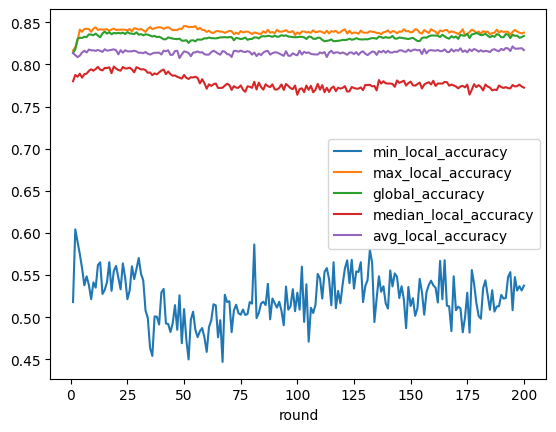

In [18]:
metrics = ["round","min_accuracy","max_accuracy","global_accuracy","median","avg"]
metrics = ["round","min_local_accuracy","max_local_accuracy","global_accuracy","median_local_accuracy","avg_local_accuracy"]

df['min_local_accuracy'] = df['min_accuracy']
df['max_local_accuracy'] = df['max_accuracy']
df['median_local_accuracy'] = df['median']
df['avg_local_accuracy'] = df['avg']

dfMetricsClass = df[metrics]
lines = dfMetricsClass.plot.line(x='round')

lines

In [19]:
lines.figure.savefig('metrics_flower_isabela_smote_fix.pdf')